<a href="https://colab.research.google.com/github/Gunji-ng/Hamoye_Data_Science_Internship/blob/master/Submitted%20Projects/Stage_5_Project/Stage_5_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/household_power_consumption.txt', sep=';')
df.head(20)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.



,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [5]:
df.Date = pd.to_datetime(df.Date)

In [6]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0,240.43,4,0,0,0.0
2075255,2010-11-26,20:59:00,0.944,0,240,4,0,0,0.0
2075256,2010-11-26,21:00:00,0.938,0,239.82,3.8,0,0,0.0
2075257,2010-11-26,21:01:00,0.934,0,239.7,3.8,0,0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    object        
 3   Global_reactive_power  object        
 4   Voltage                object        
 5   Global_intensity       object        
 6   Sub_metering_1         object        
 7   Sub_metering_2         object        
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 142.5+ MB


In [8]:
df.set_index('Date', inplace=True)

In [9]:
df

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...
2010-11-26,20:58:00,0.946,0,240.43,4,0,0,0.0
2010-11-26,20:59:00,0.944,0,240,4,0,0,0.0
2010-11-26,21:00:00,0.938,0,239.82,3.8,0,0,0.0


In [10]:
df.isnull().sum()

Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [11]:
df[df.Global_active_power=='?']

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-21,11:23:00,?,?,?,?,?,?,NaN
2006-12-21,11:24:00,?,?,?,?,?,?,NaN
2006-12-30,10:08:00,?,?,?,?,?,?,NaN
2006-12-30,10:09:00,?,?,?,?,?,?,NaN
2007-01-14,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...
2010-09-28,19:09:00,?,?,?,?,?,?,NaN
2010-09-28,19:10:00,?,?,?,?,?,?,NaN
2010-09-28,19:11:00,?,?,?,?,?,?,NaN


In [12]:
df.replace('?', np.NaN, inplace=True)

In [13]:
df.isnull().sum()

Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [14]:
df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']] = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']].astype('float')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 to 2010-11-26
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Time                   object 
 1   Global_active_power    float64
 2   Global_reactive_power  float64
 3   Voltage                float64
 4   Global_intensity       float64
 5   Sub_metering_1         float64
 6   Sub_metering_2         float64
 7   Sub_metering_3         float64
dtypes: float64(7), object(1)
memory usage: 142.5+ MB


In [16]:
mean_dict = {'Global_active_power': np.mean(df['Global_active_power']), 'Global_reactive_power': np.mean(df['Global_reactive_power']),
             'Voltage': np.mean(df['Voltage']), 'Global_intensity': np.mean(df['Global_intensity']),
             'Sub_metering_1': np.mean(df['Sub_metering_1']), 'Sub_metering_2': np.mean(df['Sub_metering_2']),
             'Sub_metering_3': np.mean(df['Sub_metering_3'])}

In [17]:
df.fillna(value=mean_dict, axis=0, inplace=True)

In [18]:
#df.interpolate(axis=0, inplace=True)

In [19]:
df.isnull().sum()

Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 to 2010-11-26
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Time                   object 
 1   Global_active_power    float64
 2   Global_reactive_power  float64
 3   Voltage                float64
 4   Global_intensity       float64
 5   Sub_metering_1         float64
 6   Sub_metering_2         float64
 7   Sub_metering_3         float64
dtypes: float64(7), object(1)
memory usage: 142.5+ MB


In [21]:
df_daily = df.resample('D').sum()
df_daily

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0


In [22]:
df_daily.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [23]:
#df_daily.fillna(value=mean_dict, axis=0, inplace=True)

In [24]:
#df_daily.isnull().sum()

In [25]:
MA = df_daily['Global_active_power'].rolling(30).mean()

In [26]:
plt.close()

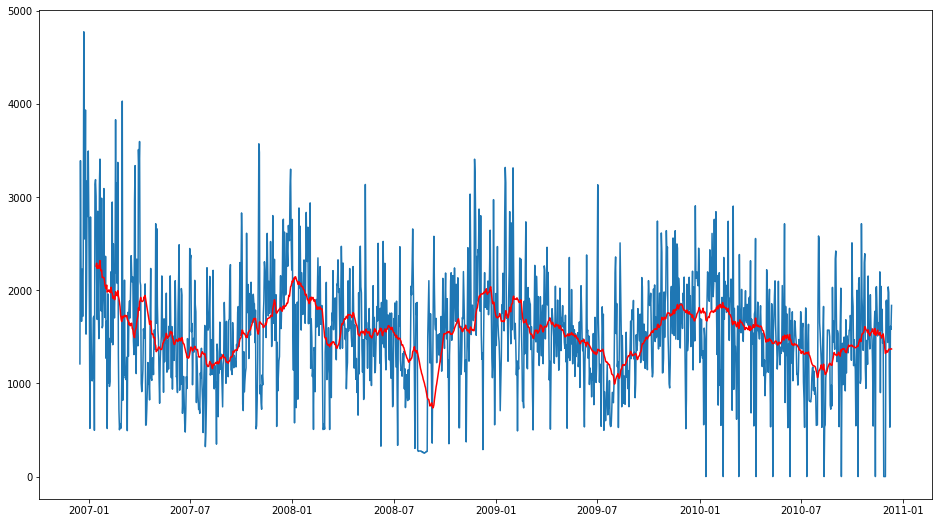

In [27]:
plt.figure(figsize=(16, 9))
plt.plot(df_daily.index, df_daily['Global_active_power'])
plt.plot(MA, color='r');

In [28]:
pro_df = pd.DataFrame()

In [29]:
pro_df['y'] = df_daily['Global_active_power']

In [30]:
pro_df['ds'] = df_daily.index

In [31]:
pro_df.reset_index(inplace=True)
pro_df

,index,y,ds
0,2006-12-16,1209.176,2006-12-16
1,2006-12-17,3390.460,2006-12-17
2,2006-12-18,2203.826,2006-12-18
3,2006-12-19,1666.194,2006-12-19
4,2006-12-20,2225.748,2006-12-20
...,...,...,...
1452,2010-12-07,1109.574,2010-12-07
1453,2010-12-08,529.698,2010-12-08
1454,2010-12-09,1612.092,2010-12-09
1455,2010-12-10,1579.692,2010-12-10


In [32]:
pro_df.drop(columns=['index'], inplace=True)
pro_df

,y,ds
0,1209.176,2006-12-16
1,3390.460,2006-12-17
2,2203.826,2006-12-18
3,1666.194,2006-12-19
4,2225.748,2006-12-20
...,...,...
1452,1109.574,2010-12-07
1453,529.698,2010-12-08
1454,1612.092,2010-12-09
1455,1579.692,2010-12-10


In [33]:
np.corrcoef(df_daily['Global_active_power'], df_daily['Global_reactive_power'])[0,1]

0.12708121315608967

In [34]:
np.corrcoef(df_daily['Voltage'], df_daily['Global_intensity'])[0,1]

0.2692294770108169

In [35]:
train_df = pro_df[:-365]
test_df = pro_df[-365:]

In [36]:
model = Prophet()
model.fit(train_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
future = model.make_future_dataframe(periods= 365 , freq= 'D' )
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1652.571508,1484.146769,2927.269898,1652.571508,1652.571508,493.008951,493.008951,493.008951,149.605738,149.605738,149.605738,343.403213,343.403213,343.403213,0.0,0.0,0.0,2145.580459
1,2006-12-17,1652.402305,1416.687590,2875.613992,1652.402305,1652.402305,496.504609,496.504609,496.504609,138.197459,138.197459,138.197459,358.307150,358.307150,358.307150,0.0,0.0,0.0,2148.906914
2,2006-12-18,1652.233101,1196.677965,2638.980668,1652.233101,1652.233101,272.523643,272.523643,272.523643,-101.330342,-101.330342,-101.330342,373.853985,373.853985,373.853985,0.0,0.0,0.0,1924.756744
3,2006-12-19,1652.063898,1332.788301,2762.854430,1652.063898,1652.063898,391.332085,391.332085,391.332085,1.644273,1.644273,1.644273,389.687812,389.687812,389.687812,0.0,0.0,0.0,2043.395983
4,2006-12-20,1651.894694,1311.335258,2788.525053,1651.894694,1651.894694,368.307370,368.307370,368.307370,-37.130219,-37.130219,-37.130219,405.437589,405.437589,405.437589,0.0,0.0,0.0,2020.202064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,2010-12-07,1514.917547,1073.386348,2485.585450,1510.220465,1520.028178,280.119379,280.119379,280.119379,1.644273,1.644273,1.644273,278.475106,278.475106,278.475106,0.0,0.0,0.0,1795.036926
1453,2010-12-08,1514.869482,994.789965,2463.280717,1510.147353,1520.006144,241.000799,241.000799,241.000799,-37.130219,-37.130219,-37.130219,278.131018,278.131018,278.131018,0.0,0.0,0.0,1755.870281
1454,2010-12-09,1514.821416,952.872832,2366.576962,1510.074240,1520.002993,166.884414,166.884414,166.884414,-112.797706,-112.797706,-112.797706,279.682120,279.682120,279.682120,0.0,0.0,0.0,1681.705830
1455,2010-12-10,1514.773351,1042.390066,2469.576728,1509.993520,1519.983835,245.026143,245.026143,245.026143,-38.189203,-38.189203,-38.189203,283.215347,283.215347,283.215347,0.0,0.0,0.0,1759.799494


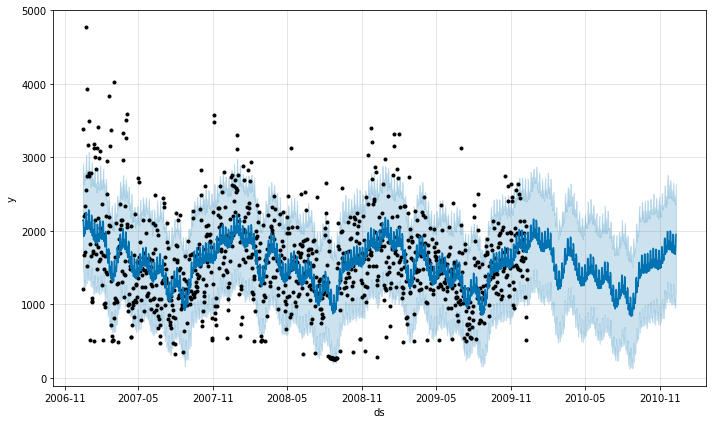

In [38]:
model.plot(forecast)
plt.show()

In [39]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    errors = []
    for i, pair in enumerate(zip(y_true, y_pred)):
      if pair[0] == 0:
        error = 0
      else:
        error = np.abs((pair[0] - pair[1]) / pair[0])
      errors.append(error)
    return np.mean(errors) * 100

In [40]:
mean_absolute_percentage_error(test_df['y'], forecast['yhat'][-365:])

26.93570938649644

In [41]:
from sklearn.metrics import mean_squared_error as mse

In [42]:
np.sqrt(mse(test_df['y'], forecast['yhat'][-365:]))

562.4150796707931

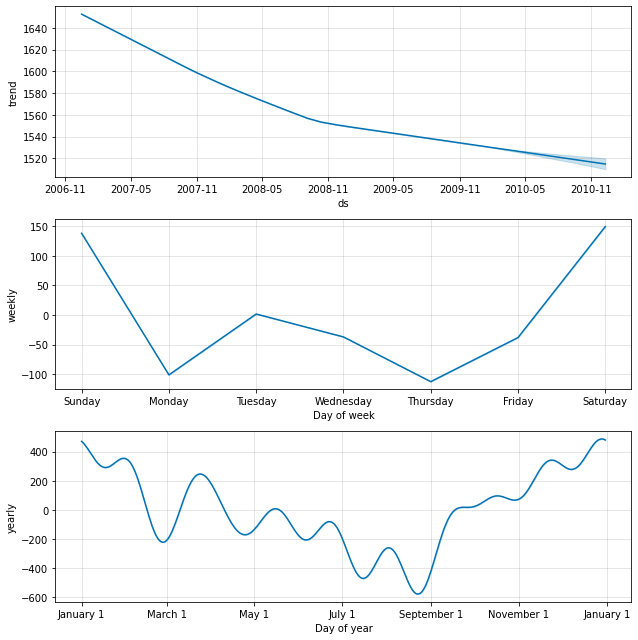

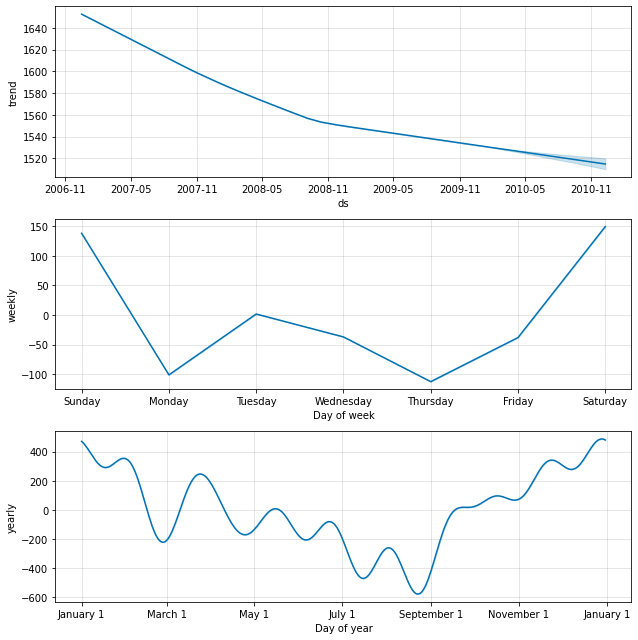

In [43]:
model.plot_components(forecast)

#Multivariate Time Series

In [44]:
pro_df_2 = pd.DataFrame()

In [45]:
pro_df_2['y'] = df_daily['Global_active_power']

In [46]:
pro_df_2['ds'] = df_daily.index

In [47]:
pro_df_2[['add1', 'add2', 'add3', 'add4', 'add5', 'add6']] = df_daily[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

In [48]:
pro_df_2

,y,ds,add1,add2,add3,add4,add5,add6
2006-12-16,1209.176,2006-12-16,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,2006-12-17,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,2006-12-18,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,2006-12-19,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,2006-12-20,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...
2010-12-07,1109.574,2010-12-07,285.912,345914.85,4892.0,1724.0,646.0,6444.0
2010-12-08,529.698,2010-12-08,169.098,346744.70,2338.2,0.0,514.0,3982.0
2010-12-09,1612.092,2010-12-09,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
2010-12-10,1579.692,2010-12-10,170.268,345975.37,6741.2,1104.0,780.0,9812.0


In [49]:
train_df_2 = pro_df_2[:-365]
test_df_2 = pro_df_2[-365:]

In [50]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')
model.fit(train_df_2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
future = model.make_future_dataframe(periods= 365 , freq= 'D' )
future['add1'] = pro_df_2['add1'].reset_index().drop(columns=['index'])
future['add2'] = pro_df_2['add2'].reset_index().drop(columns=['index'])
future['add3'] = pro_df_2['add3'].reset_index().drop(columns=['index'])
future['add4'] = pro_df_2['add4'].reset_index().drop(columns=['index'])
future['add5'] = pro_df_2['add5'].reset_index().drop(columns=['index'])
future['add6'] = pro_df_2['add6'].reset_index().drop(columns=['index'])
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,add2_lower,add2_upper,add3,add3_lower,add3_upper,add4,add4_lower,add4_upper,add5,add5_lower,add5_upper,add6,add6_lower,add6_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1564.563995,1114.204577,1152.825753,1564.563995,1564.563995,37.066328,37.066328,37.066328,-113.155802,-113.155802,-113.155802,-364.620076,-364.620076,-364.620076,2.783960,2.783960,2.783960,1.387951,1.387951,1.387951,-5.027683,-5.027683,-5.027683,-430.756073,-430.756073,-430.756073,-441.565321,-441.565321,-441.565321,1.648455,1.648455,1.648455,9.160793,9.160793,9.160793,0.0,0.0,0.0,1133.807922
1,2006-12-17,1564.659399,3399.947329,3438.592531,1564.659399,1564.659399,-13.283332,-13.283332,-13.283332,-0.207554,-0.207554,-0.207554,1855.265478,1855.265478,1855.265478,-0.616228,-0.616228,-0.616228,-2.205435,-2.205435,-2.205435,5.614197,5.614197,5.614197,1855.748816,1855.748816,1855.748816,1844.567127,1844.567127,1844.567127,1.244026,1.244026,1.244026,9.937664,9.937664,9.937664,0.0,0.0,0.0,3420.408214
2,2006-12-18,1564.754802,2182.011542,2219.743238,1564.754802,1564.754802,3.636730,3.636730,3.636730,0.530729,0.530729,0.530729,614.674617,614.674617,614.674617,1.006095,1.006095,1.006095,-0.659914,-0.659914,-0.659914,6.470353,6.470353,6.470353,635.230265,635.230265,635.230265,625.658610,625.658610,625.658610,-1.115487,-1.115487,-1.115487,10.687142,10.687142,10.687142,0.0,0.0,0.0,2199.985067
3,2006-12-19,1564.850206,1651.052496,1690.102958,1564.850206,1564.850206,6.495650,6.495650,6.495650,1.025824,1.025824,1.025824,96.128155,96.128155,96.128155,1.380734,1.380734,1.380734,-5.575777,-5.575777,-5.575777,-3.420336,-3.420336,-3.420336,105.911549,105.911549,105.911549,96.034250,96.034250,96.034250,-1.518309,-1.518309,-1.518309,11.395608,11.395608,11.395608,0.0,0.0,0.0,1670.761755
4,2006-12-20,1564.945609,2203.871313,2241.788255,1564.945609,1564.945609,3.845945,3.845945,3.845945,1.224961,1.224961,1.224961,630.520965,630.520965,630.520965,2.783960,2.783960,2.783960,-0.686561,-0.686561,-0.686561,6.527262,6.527262,6.527262,657.767486,657.767486,657.767486,644.216532,644.216532,644.216532,1.501330,1.501330,1.501330,12.049624,12.049624,12.049624,0.0,0.0,0.0,2222.713095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,2010-12-07,1594.669044,1040.214585,1213.854654,1504.771870,1675.434831,-29.068257,-29.068257,-29.068257,-0.122664,-0.122664,-0.122664,-434.170614,-434.170614,-434.170614,-0.099426,-0.099426,-0.099426,1.289259,1.289259,1.289259,-3.107972,-3.107972,-3.107972,-463.832073,-463.832073,-463.832073,-465.279673,-465.279673,-465.279673,-1.518309,-1.518309,-1.518309,2.965909,2.965909,2.965909,0.0,0.0,0.0,1130.836971
1453,2010-12-08,1594.687541,461.004904,632.150433,1504.258644,1675.717920,1.711636,1.711636,1.711636,0.249026,0.249026,0.249026,-1049.191956,-1049.191956,-1049.191956,2.783960,2.783960,2.783960,1.419533,1.419533,1.419533,-6.221496,-6.221496,-6.221496,-1044.285375,-1044.285375,-1044.285375,-1049.249297,-1049.249297,-1049.249297,1.501330,1.501330,1.501330,3.462591,3.462591,3.462591,0.0,0.0,0.0,550.402166
1454,2010-12-09,1594.706039,1536.369445,1712.393935,1504.276765,1676.001010,-6.788709,-6.788709,-6.788709,0.780998,0.780998,0.780998,36.933133,36.933133,36.933133,-0.234899,-0.234899,-0.234899,-0.125988,-0.125988,-0.125988,-0.013416,-0.013416,-0.013416,34.155134,34.155134,34.155134,30.551118,30.551118,30.551118,-0.421072,-0.421072,-0.421072,4.025088,4.025088,4.025088,0.0,0.0,0.0,1628.861173
1455,2010-12-10,1594.724536,1522.214982,1697.315794,1504.062169,1676.283758,1.403347,1.403347,1.403347,-0.095557,-0.

In [52]:
future

,ds,add1,add2,add3,add4,add5,add6
0,2006-12-16,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
1452,2010-12-07,285.912,345914.85,4892.0,1724.0,646.0,6444.0
1453,2010-12-08,169.098,346744.70,2338.2,0.0,514.0,3982.0
1454,2010-12-09,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
1455,2010-12-10,170.268,345975.37,6741.2,1104.0,780.0,9812.0


In [53]:
mean_absolute_percentage_error(test_df_2['y'], forecast['yhat'][-365:])

0.9129821926504864

In [54]:
np.sqrt(mse(test_df_2['y'], forecast['yhat'][-365:]))

31.98932017957665

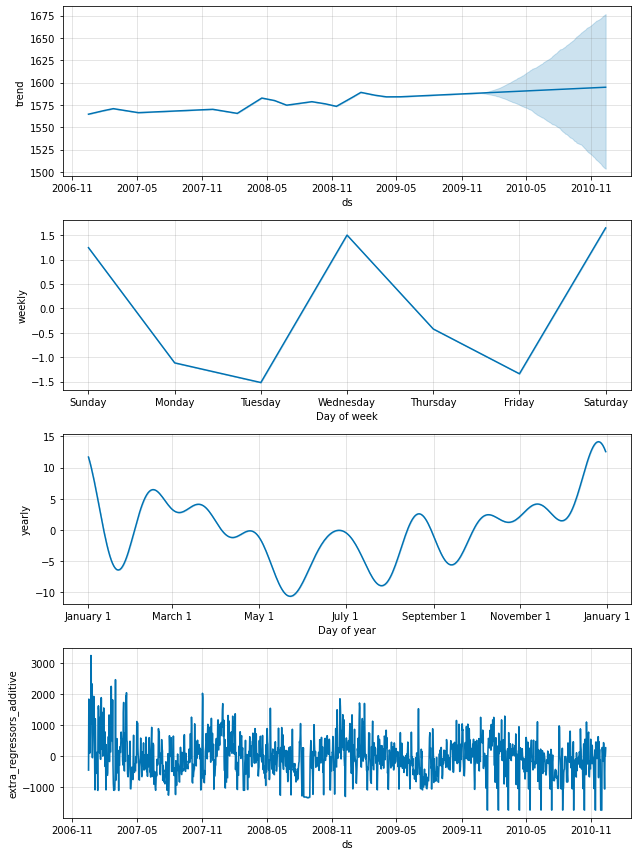

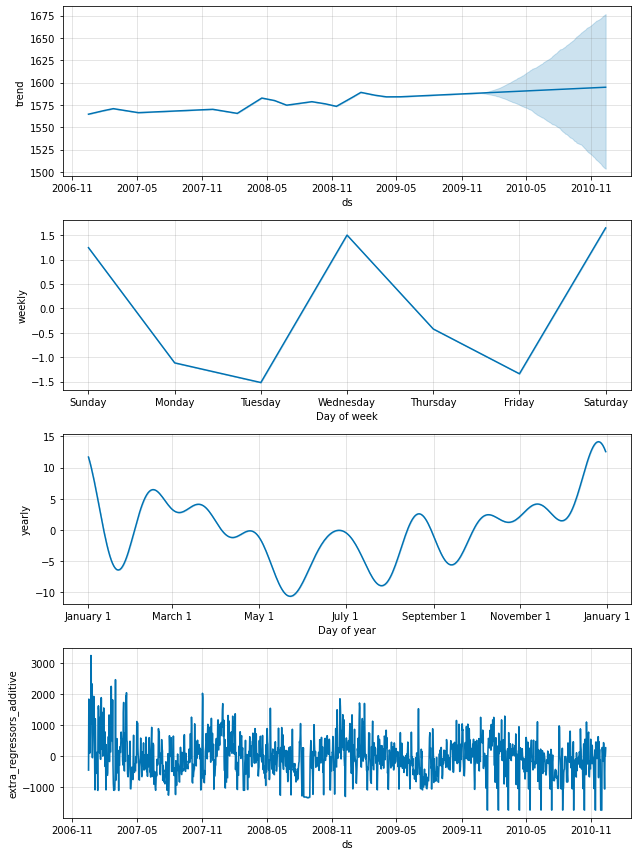

In [55]:
model.plot_components(forecast)